## Training Pipeline using PyTorch 
Making a neural network 

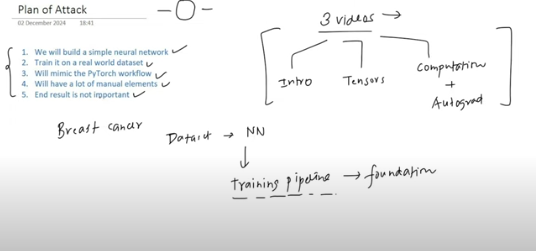

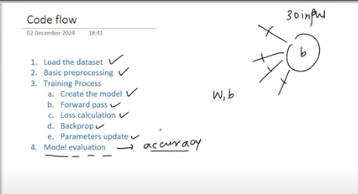

#### Imports

In [42]:
# import
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


#### Load Breast cancer dataset from github

In [43]:
# Creating pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [44]:
df.shape

(569, 33)

In [45]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [46]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Train Test Split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

#### Scaling

In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
X_train

array([[ 1.97942001,  0.99549219,  1.97391855, ...,  1.48994566,
         0.4050942 , -0.29444102],
       [-0.36016579,  0.70927956, -0.26634356, ...,  1.29495555,
         0.86654573,  2.23817873],
       [-1.41514302, -1.26163184, -1.35473339, ..., -0.94179419,
         0.6612737 ,  0.05993777],
       ...,
       [-0.92270492, -0.85209181, -0.88655035, ..., -0.5032188 ,
        -0.48989185,  1.33702829],
       [ 1.75440436,  0.08798871,  1.64815337, ...,  0.45406074,
         0.28849969, -1.35370744],
       [ 1.31302751,  1.35616665,  1.38503534, ...,  1.09844209,
         0.92730625,  0.7742239 ]], shape=(455, 30))

In [50]:
y_train

250    M
229    M
63     B
490    B
60     B
      ..
270    B
81     B
474    B
321    M
30     M
Name: diagnosis, Length: 455, dtype: object

#### Label Encoder

In [51]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [52]:
y_train

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,

#### Numpy array to Tensors

In [53]:
# X_train_tensor = torch.from_numpy(X_train).float()
# X_test_tensor = torch.from_numpy(X_test).float()
# y_train_tensor = torch.from_numpy(y_train).float()
# y_test_tensor = torch.from_numpy(y_test).float()

X_train_tensor = torch.from_numpy(X_train.astype('float32'))
X_test_tensor = torch.from_numpy(X_test.astype('float32'))
y_train_tensor = torch.from_numpy(y_train.astype('float32'))
y_test_tensor = torch.from_numpy(y_test.astype('float32'))


In [54]:
X_train_tensor.shape

torch.Size([455, 30])

In [55]:
y_train_tensor.shape

torch.Size([455])

In [56]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [57]:
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

In [58]:
train_dataset[10]

(tensor([-0.2534, -0.8056, -0.3160, -0.3240, -0.7620, -0.9554, -1.0604, -1.1597,
         -0.6205, -0.5503, -0.7619, -1.1375, -0.7999, -0.5261, -1.1065, -0.9547,
         -1.0206, -1.4766, -0.8380, -0.4375, -0.3772, -0.8321, -0.4454, -0.4218,
         -0.8114, -0.7441, -1.2401, -1.3359, -0.3749,  0.0019]),
 tensor(0.))

In [59]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = DataLoader(test_dataset, batch_size=32, shuffle=True)

### Making Neural Network

#### Defining the model

In [60]:
import torch.nn as nn

class MySimpleNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.linear = nn.Linear(num_features, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, features):
        out = self.linear(features)
        out = self.sigmoid(out)
        return out


#### Important Parameters

In [61]:
learning_rate = 0.1
epochs = 25

In [62]:
# define the loss function
loss_function = nn.BCELoss()

#### Training Pipeline

In [63]:
# Create model
model = MySimpleNN(X_train_tensor.shape[1])

# define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# define loop
for epoch in range(epochs):

    # Forward pass
    y_pred = model(X_train_tensor)

    # Loss calculate
    loss = loss_function(y_pred, y_train_tensor.view(-1, 1))

    # zero gradients (Clearning the gradient bcz gradient are accumulate)
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Parameters Update
    optimizer.step()

    # priny loss in each epoch
    print(f"Epoch:{epoch+1}, Loss: {loss.item()} ")

Epoch:1, Loss: 0.8732835650444031 
Epoch:2, Loss: 0.6223193407058716 
Epoch:3, Loss: 0.4930228292942047 
Epoch:4, Loss: 0.418671190738678 
Epoch:5, Loss: 0.37022703886032104 
Epoch:6, Loss: 0.3358112573623657 
Epoch:7, Loss: 0.30986499786376953 
Epoch:8, Loss: 0.28945162892341614 
Epoch:9, Loss: 0.272871196269989 
Epoch:10, Loss: 0.2590683698654175 
Epoch:11, Loss: 0.24735143780708313 
Epoch:12, Loss: 0.23724670708179474 
Epoch:13, Loss: 0.22841782867908478 
Epoch:14, Loss: 0.22061902284622192 
Epoch:15, Loss: 0.21366573870182037 
Epoch:16, Loss: 0.20741672813892365 
Epoch:17, Loss: 0.20176160335540771 
Epoch:18, Loss: 0.19661282002925873 
Epoch:19, Loss: 0.1918998807668686 
Epoch:20, Loss: 0.18756523728370667 
Epoch:21, Loss: 0.18356159329414368 
Epoch:22, Loss: 0.17984937131404877 
Epoch:23, Loss: 0.17639535665512085 
Epoch:24, Loss: 0.17317144572734833 
Epoch:25, Loss: 0.17015354335308075 


In [64]:
print(f"Model Weights: {model.linear.weight}\n")
print(f"Model bias: {model.linear.bias}")

Model Weights: Parameter containing:
tensor([[ 0.1328,  0.1395,  0.1130,  0.3858,  0.1937,  0.2787,  0.1026,  0.1038,
          0.0781, -0.1632,  0.3108, -0.1158,  0.3070,  0.3096,  0.0944, -0.0571,
         -0.0952, -0.0125, -0.0855,  0.0344,  0.3263,  0.1653,  0.2606,  0.1088,
          0.1241,  0.0498,  0.3844,  0.3924,  0.0794,  0.0401]],
       requires_grad=True)

Model bias: Parameter containing:
tensor([-0.1433], requires_grad=True)


#### Evaluation

In [ ]:
# model evaluation using test_loader
model.eval()  # Set the model to evaluation mode
accuracy_list = []

with torch.no_grad():
    for batch_features, batch_

    y_pred = model.forward(X_test_tensor)
    y_pred = (y_pred > 0.5).float()
    accuracy = (y_pred == y_test_tensor).float().mean()
    print(f"Accuracy: {accuracy.item()}")



Accuracy: 0.5203139185905457
